In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap4
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [14]:
import importlib
from d2l.classification.model import SoftmaxClassifier, SoftmaxClassifierLogSumExp
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt

In [3]:
import torch
device = mps()
print(f'Using device: {device}')

Using device: mps


In [4]:
X = torch.tensor([[1.0, 2.0, 3.0], 
                  [4.0, 5.0, 6.0]])
X.sum(dim=0, keepdim=True), X.sum(dim=1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [5]:
def softmax(X: torch.Tensor) -> torch.Tensor:
    return torch.exp(X) / torch.exp(X).sum(dim=1, keepdim=True)

In [6]:
X = torch.rand((2, 5))
X

tensor([[0.2827, 0.2301, 0.0108, 0.6300, 0.3371],
        [0.8467, 0.7123, 0.8077, 0.7712, 0.2202]])

In [7]:
X_prob = softmax(X)
X_prob, X_prob.sum(dim=1, keepdim=True)

(tensor([[0.1930, 0.1831, 0.1470, 0.2731, 0.2038],
         [0.2327, 0.2034, 0.2238, 0.2158, 0.1244]]),
 tensor([[1.0000],
         [1.0000]]))

In [8]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [9]:
rng = torch.Generator().manual_seed(42)

In [10]:
data = FashionMNISTDataset()
model = SoftmaxClassifier(
    num_features=784, 
    num_outputs=10,
    rng=rng
)
model_logsumexp = SoftmaxClassifierLogSumExp(
    num_features=784, 
    num_outputs=10,
    rng=rng
)

In [11]:
trainer = Trainer(model=model, optimizer=SGDOptimizer(model.parameters(), lr=0.05))
all_epoch_losses = trainer.train(data.get_train_dataloader_epochs(batch_size=256, epochs=10))
trainer_logsumexp = Trainer(model=model_logsumexp, optimizer=SGDOptimizer(model_logsumexp.parameters(), lr=0.05))
all_epoch_losses_logsumexp = trainer_logsumexp.train(data.get_train_dataloader_epochs(batch_size=256, epochs=10))

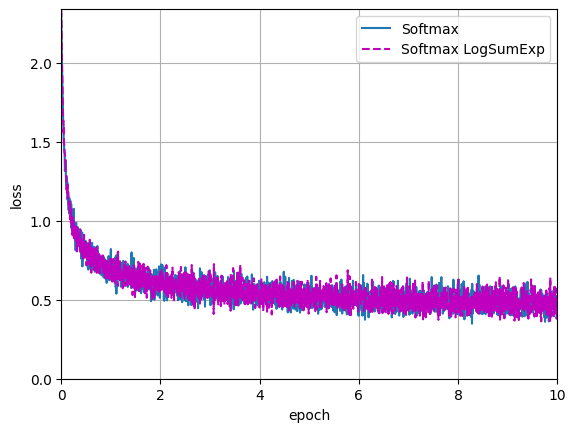

In [15]:
fig, ax = plt.subplots()
plot_losses(ax, [all_epoch_losses, all_epoch_losses_logsumexp], labels=['Softmax', 'Softmax LogSumExp'])

In [16]:
evaluator = ClassificationEvaluator(model=model)
evaluator_logsumexp = ClassificationEvaluator(model=model_logsumexp)
test_loss = evaluator.loss(data.get_test_dataloader(batch_size=256))
test_loss_logsumexp = evaluator_logsumexp.loss(data.get_test_dataloader(batch_size=256))
print(f'Test loss: {test_loss:.4f}')
print(f'Test loss (LogSumExp): {test_loss_logsumexp:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=256))
accuracy_logsumexp = evaluator_logsumexp.accuracy(data.get_test_dataloader(batch_size=256))
print(f'Accuracy: {accuracy:.2%}')
print(f'Accuracy (LogSumExp): {accuracy_logsumexp:.2%}')

Test loss: 0.5051
Test loss (LogSumExp): 0.5199
Accuracy: 82.88%
Accuracy (LogSumExp): 81.55%


In [17]:
(X, y) = next(iter(data.get_test_dataloader(batch_size=18)))

In [18]:
y_hat = model.predict(X)
print('Predicted labels:', data.get_text_labels(y_hat.tolist()))
print('True labels:     ', data.get_text_labels(y.tolist()))
print(f'accuracy: {(y_hat == y).sum() / y.numel():.2%}')
y_hat_logsumexp = model_logsumexp.predict(X)
print('Predicted labels (LogSumExp):', data.get_text_labels(y_hat_logsumexp.tolist()))
print('True labels:                 ', data.get_text_labels(y.tolist()))
print(f'accuracy (LogSumExp): {(y_hat_logsumexp == y).sum() / y.numel():.2%}')

Predicted labels: ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sandal', 'dress', 'coat', 'trouser', 'pullover', 'coat']
True labels:      ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sneaker', 'dress', 'coat', 'trouser', 'pullover', 'coat']
accuracy: 94.44%
Predicted labels (LogSumExp): ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sandal', 'dress', 'coat', 'trouser', 'pullover', 'shirt']
True labels:                  ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sneaker', 'dress', 'coat', 'trouser', 'pullover', 'coat']
accuracy (LogSumExp): 88.89%
